In [1]:
import numpy as np
data = np.load("../../Dataset/data.npz", allow_pickle=True)

X = data["x_train"]
Y = data["y_train"]
x_test = data["x_test"]
y_test = data["y_test"]

In [2]:
X.shape

(3720,)

In [2]:
from collections import Counter

label_counts = Counter(Y)

for label, count in label_counts.items():
    print(f"Label {label}: {count} images")


Label Tony_Blair: 60 images
Label Mahmoud_Abbas: 60 images
Label Alejandro_Toledo: 60 images
Label Vicente_Fox: 60 images
Label Gray_Davis: 60 images
Label Michael_Bloomberg: 60 images
Label Hamid_Karzai: 60 images
Label Jennifer_Aniston: 60 images
Label Paul_Bremer: 60 images
Label Megawati_Sukarnoputri: 60 images
Label Roh_Moo-hyun: 60 images
Label Ariel_Sharon: 60 images
Label Tiger_Woods: 60 images
Label Andre_Agassi: 60 images
Label Jennifer_Capriati: 60 images
Label Jeremy_Greenstock: 60 images
Label Gerhard_Schroeder: 60 images
Label Hugo_Chavez: 60 images
Label Junichiro_Koizumi: 60 images
Label Laura_Bush: 60 images
Label Carlos_Menem: 60 images
Label Gloria_Macapagal_Arroyo: 60 images
Label Igor_Ivanov: 60 images
Label Bill_Clinton: 60 images
Label Lleyton_Hewitt: 60 images
Label Nestor_Kirchner: 60 images
Label Alvaro_Uribe: 60 images
Label Serena_Williams: 60 images
Label Atal_Bihari_Vajpayee: 60 images
Label Saddam_Hussein: 60 images
Label Luiz_Inacio_Lula_da_Silva: 60 ima

In [4]:
import numpy as np

# Assuming y_train is your list of labels corresponding to x_train
unique_identities = np.unique(Y)

print(f"There are {len(unique_identities)} unique identities.")

There are 62 unique identities.


In [3]:
from collections import Counter

# Assuming y_train is your list of labels corresponding to x_train
label_counts = Counter(Y)

# Find the identity with the least number of images
min_label, min_count = min(label_counts.items(), key=lambda x: x[1])

print(f"Identity {min_label} has the least number of images: {min_count} images")


Identity Tony_Blair has the least number of images: 60 images


In [6]:
Y[0]

'Tony_Blair'

In [7]:
x_test.shape

(431, 250, 250, 3)

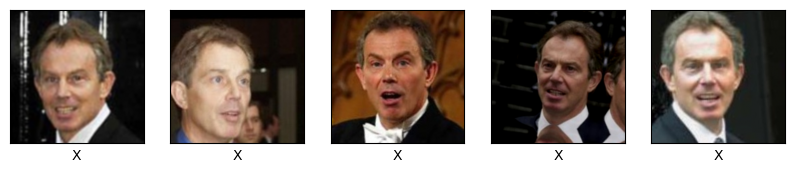

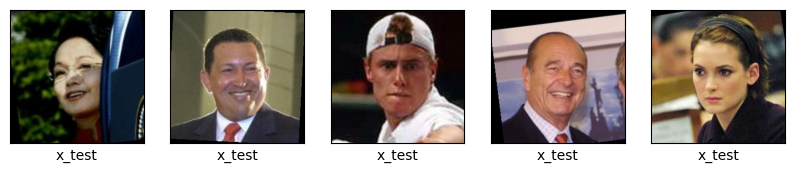

In [4]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, title):
    plt.figure(figsize=(10,10))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(title)
    plt.show()

# Plot images from X
plot_images(X, "X")

# Plot images from x_test
plot_images(x_test, "x_test")


In [5]:
import cv2
import numpy as np

def normalize_images(image_array):
    # Normalize the images and convert them to 8-bit
    for i, image in enumerate(image_array):
        image = ((image - np.min(image)) / (np.max(image) - np.min(image))) * 255
        image = cv2.convertScaleAbs(image)
        image_array[i] = image
    return image_array

# Apply the function to our X and x_test
X_normalized = normalize_images(X)
x_test_normalized = normalize_images(x_test)


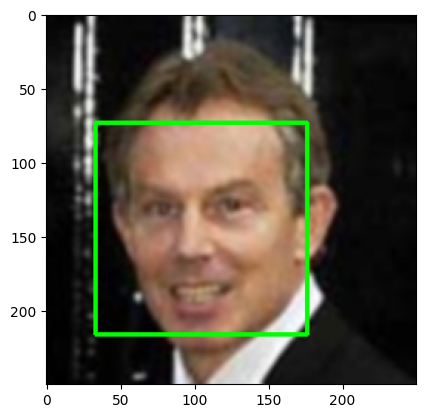

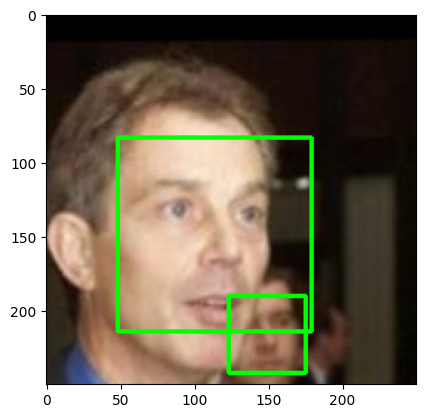

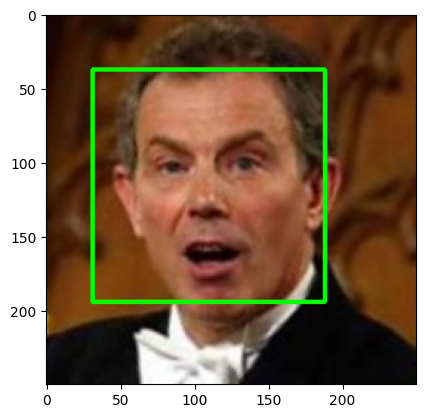

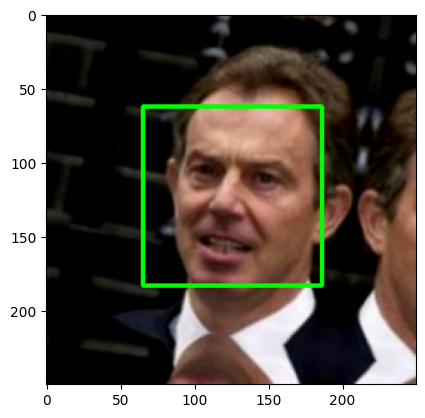

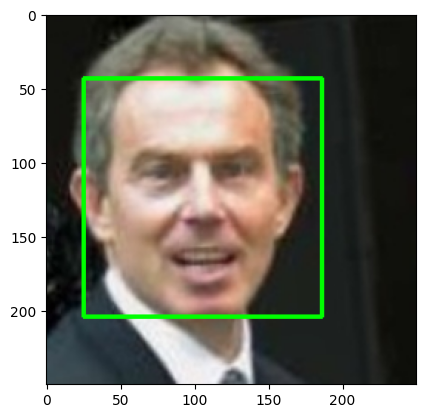

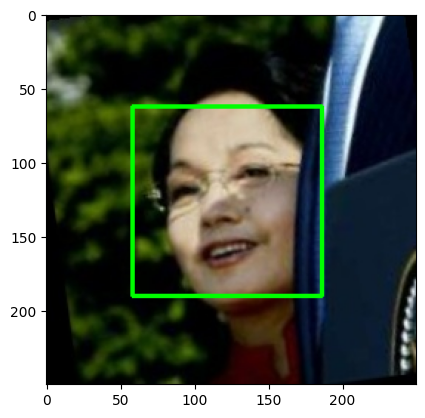

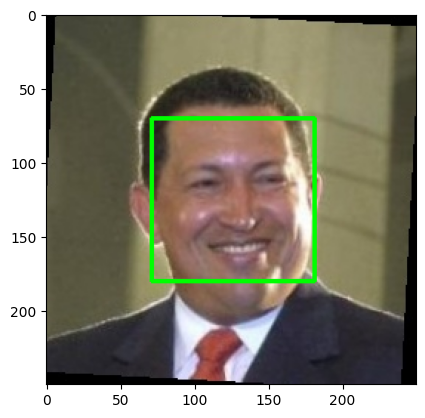

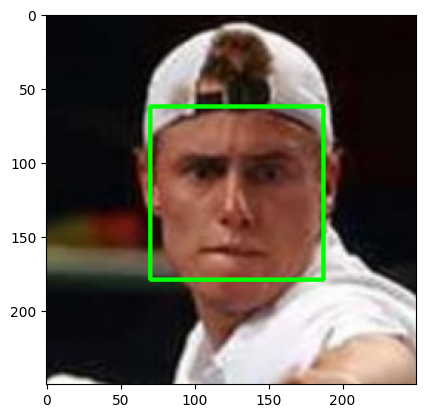

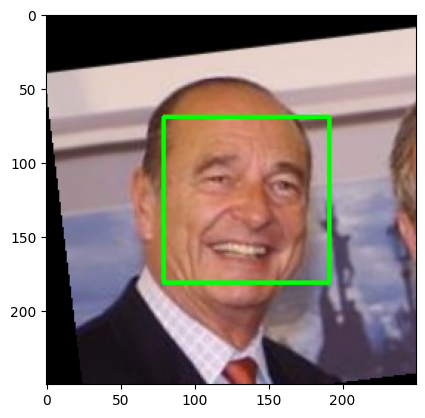

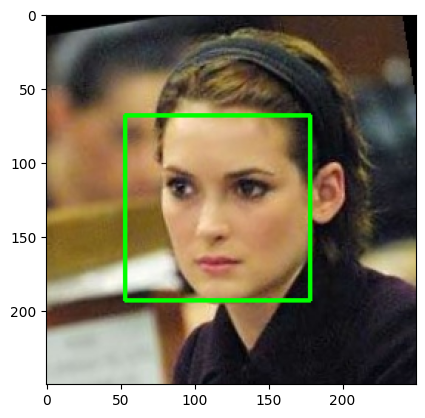

In [6]:
import cv2
import matplotlib.pyplot as plt

def detect_faces_in_image(input_image):
    # Initialize face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to 8-bit
    image = cv2.convertScaleAbs(input_image)
    
    # Check if the image is already grayscale
    if len(image.shape) == 3:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()

for i, image in enumerate(X_normalized):
    if i < 5:
        detect_faces_in_image(image)

for i, image in enumerate(x_test_normalized):
    if i < 5:
        detect_faces_in_image(image)


In [11]:
print(x_test[0].dtype)


float64


# crop the face

In [7]:
import cv2

def detect_and_crop_faces_in_image(input_image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to 8-bit
    image = cv2.convertScaleAbs(input_image)
    
    # Check if the image is already grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # If a face is detected, crop it out
    if len(faces) > 0:
        x, y, w, h = faces[0]
        cropped_face = image[y:y+h, x:x+w]
        return cropped_face
    return image

final_X = []
final_x_test = []

# Call the function with your images
for image in X_normalized:
    cropped_face = detect_and_crop_faces_in_image(image)
    final_X.append(cropped_face) 

for image in x_test_normalized:
    cropped_face = detect_and_crop_faces_in_image(image)
    final_x_test.append(cropped_face)  




In [18]:
final_X[0].shape

(143, 143, 3)

In [8]:
for i, images in enumerate(final_x_test):
    for j, image in enumerate(images):
        print(f"Image {j+1} in list {i+1} has dimensions {image.shape}.")


Image 1 in list 1 has dimensions (128, 3).
Image 2 in list 1 has dimensions (128, 3).
Image 3 in list 1 has dimensions (128, 3).
Image 4 in list 1 has dimensions (128, 3).
Image 5 in list 1 has dimensions (128, 3).
Image 6 in list 1 has dimensions (128, 3).
Image 7 in list 1 has dimensions (128, 3).
Image 8 in list 1 has dimensions (128, 3).
Image 9 in list 1 has dimensions (128, 3).
Image 10 in list 1 has dimensions (128, 3).
Image 11 in list 1 has dimensions (128, 3).
Image 12 in list 1 has dimensions (128, 3).
Image 13 in list 1 has dimensions (128, 3).
Image 14 in list 1 has dimensions (128, 3).
Image 15 in list 1 has dimensions (128, 3).
Image 16 in list 1 has dimensions (128, 3).
Image 17 in list 1 has dimensions (128, 3).
Image 18 in list 1 has dimensions (128, 3).
Image 19 in list 1 has dimensions (128, 3).
Image 20 in list 1 has dimensions (128, 3).
Image 21 in list 1 has dimensions (128, 3).
Image 22 in list 1 has dimensions (128, 3).
Image 23 in list 1 has dimensions (128, 3

In [9]:
from skimage import feature, transform
import cv2
import numpy as np

def extract_hog_features(images):
    hog_features_list = []
    for image in images:
        image_resized = transform.resize(image, (64, 168))
        
        # Check if the image is grayscale or color
        if len(image_resized.shape) == 3 and image_resized.shape[2] == 3:
            # The image is a color image, convert it to grayscale
            image_resized_32 = image_resized.astype(np.float32)
            gray = cv2.cvtColor(image_resized_32, cv2.COLOR_BGR2GRAY)
        else:
            # The image is already grayscale
            gray = image_resized
        
        # Extract HOG features
        hog_features = feature.hog(gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features_list.append(hog_features)
    
    return hog_features_list


hog_features_X = extract_hog_features(final_X)
hog_features_x_test = extract_hog_features(final_x_test)


In [18]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have final_X and Y from the previous steps
# final_X shape: (num_samples, image_height, image_width, num_channels)

# Define models and their respective parameter grids
models = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'params': {
            'solver': ['svd', 'lsqr', 'eigen'],
            'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
            'n_components': [None, 1, 2, 3],  # Adjust based on your needs
            'priors': [None, [0.1, 0.9], [0.5, 0.5], [0.9, 0.1]]
        }
    }
}
# Perform grid search for each model
for model_name, config in models.items():
    print(f"Grid search for {model_name}")

    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', config['model'])
    ])

    # Define the parameter grid for scaling and the model
    param_grid = {
        'classifier__' + key: value for key, value in config['params'].items()
    }

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid_search.fit(hog_features_X, Y)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")

    # Evaluate the model on the test set
    y_pred = grid_search.predict(hog_features_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy on Test Set for {model_name}: {accuracy}")
    print("\n")
# print(f"Training SVM...")
# # clf.fit(X_train, y_train)



# # Hyperparameter tuning using grid search
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
# svm_classifier = svm.SVC()
# grid_search = GridSearchCV(svm_classifier, param_grid, cv=3)
# grid_search.fit(hog_features_X, Y)

# # Make predictions on the test set using the best model
# best_model = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)
# print(f"Evaluating SVM on the test set...")
# y_pred = best_model.predict(hog_features_x_test)
# print(classification_report(y_test, y_pred))
# accuracy_test = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy_test}")


Grid search for SVM
Best Parameters for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
                           precision    recall  f1-score   support

         Alejandro_Toledo       1.00      0.62      0.77         8
             Alvaro_Uribe       0.86      0.86      0.86         7
          Amelie_Mauresmo       0.50      0.50      0.50         4
             Andre_Agassi       0.55      0.86      0.67         7
           Angelina_Jolie       0.33      0.50      0.40         4
             Ariel_Sharon       0.91      0.83      0.87        12
    Arnold_Schwarzenegger       0.40      0.22      0.29         9
     Atal_Bihari_Vajpayee       1.00      0.40      0.57         5
             Bill_Clinton       0.62      0.83      0.71         6
             Carlos_Menem       0.50      0.25      0.33         4
             Colin_Powell       0.62      0.83      0.71        12
            David_Beckham       0.33      0.50      0.40         6
          Donald_Rumsfeld   

d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Best Parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}


d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

                           precision    recall  f1-score   support

         Alejandro_Toledo       0.29      0.50      0.36         8
             Alvaro_Uribe       0.75      0.43      0.55         7
          Amelie_Mauresmo       1.00      0.50      0.67         4
             Andre_Agassi       0.50      0.14      0.22         7
           Angelina_Jolie       1.00      0.25      0.40         4
             Ariel_Sharon       0.62      0.67      0.64        12
    Arnold_Schwarzenegger       0.60      0.33      0.43         9
     Atal_Bihari_Vajpayee       0.50      0.60      0.55         5
             Bill_Clinton       0.29      0.33      0.31         6
             Carlos_Menem       0.00      0.00      0.00         4
             Colin_Powell       0.29      0.50      0.36        12
            David_Beckham       0.18      0.33      0.24         6
          Donald_Rumsfeld       0.69      0.92      0.79        12
         George_Robertson       0.00      0.00      0.00     

d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Machine Learning\Face-Recognition-System\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Machine Learning\Face-Recognition-S

Best Parameters for LogisticRegression: {'classifier__C': 1, 'classifier__penalty': 'l2'}
                           precision    recall  f1-score   support

         Alejandro_Toledo       0.86      0.75      0.80         8
             Alvaro_Uribe       1.00      0.71      0.83         7
          Amelie_Mauresmo       0.50      0.75      0.60         4
             Andre_Agassi       0.83      0.71      0.77         7
           Angelina_Jolie       0.33      0.25      0.29         4
             Ariel_Sharon       0.92      0.92      0.92        12
    Arnold_Schwarzenegger       0.57      0.44      0.50         9
     Atal_Bihari_Vajpayee       0.67      0.40      0.50         5
             Bill_Clinton       0.67      0.67      0.67         6
             Carlos_Menem       1.00      0.50      0.67         4
             Colin_Powell       0.79      0.92      0.85        12
            David_Beckham       0.43      0.50      0.46         6
          Donald_Rumsfeld       0.60  

KeyboardInterrupt: 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

print(f"Training RandomForest...")

# Hyperparameter tuning using grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    }

rdf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rdf_classifier, param_grid, cv=3)
grid_search.fit(hog_features_X, Y)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Evaluating SVM on the test set...")
y_pred = best_model.predict(hog_features_x_test)
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Training RandomForest...


KeyboardInterrupt: 

In [ ]:
print(f"Training KNN...")

# Hyperparameter tuning using grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
    }

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=3)
grid_search.fit(hog_features_X, Y)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Evaluating SVM on the test set...")
y_pred = best_model.predict(hog_features_x_test)
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

In [ ]:
print(f"Training LogisticRegression...")

# Hyperparameter tuning using grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
    }

lgr_classifier = LogisticRegression()
grid_search = GridSearchCV(lgr_classifier, param_grid, cv=3)
grid_search.fit(hog_features_X, Y)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Evaluating SVM on the test set...")
y_pred = best_model.predict(hog_features_x_test)
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

In [ ]:
print(f"Training LDA...")

# Hyperparameter tuning using grid search
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3],  # Adjust based on your needs
    'priors': [None, [0.1, 0.9], [0.5, 0.5], [0.9, 0.1]]
    }

lda_classifier = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(lda_classifier, param_grid, cv=3)
grid_search.fit(hog_features_X, Y)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Evaluating SVM on the test set...")
y_pred = best_model.predict(hog_features_x_test)
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

In [34]:
# print(type(final_X[0]))
# print(type(final_x_test[0]))


In [35]:
# for i, images in enumerate(final_X):
#     print(f"Image {i+1} has {len(images)} faces.")


In [36]:
# for i, hog_features_list in enumerate(X_train_hog):
#     for j, hog_features in enumerate(hog_features_list):
#         print(f"HOG features {j+1} in list {i+1} has length {len(hog_features)}.")


In [37]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

classifier = {'SVM': svm.SVC(C=1.0, kernel='linear')}

# Train and evaluate the classifier
for name, clf in classifier.items():
    print(f"Training {name}...")
    clf.fit(hog_features_X, Y)
    
    print(f"Evaluating {name} on the test set...")
    y_pred = clf.predict(hog_features_x_test)
    print(classification_report(y_test, y_pred))
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy_test}")


Training SVM...
Evaluating SVM on the test set...
                           precision    recall  f1-score   support

         Alejandro_Toledo       0.86      0.75      0.80         8
             Alvaro_Uribe       0.80      0.57      0.67         7
          Amelie_Mauresmo       0.40      0.50      0.44         4
             Andre_Agassi       0.57      0.57      0.57         7
           Angelina_Jolie       0.33      0.25      0.29         4
             Ariel_Sharon       0.74      0.88      0.80        16
    Arnold_Schwarzenegger       0.36      0.50      0.42         8
     Atal_Bihari_Vajpayee       0.75      0.60      0.67         5
             Bill_Clinton       0.33      0.67      0.44         6
             Carlos_Menem       0.75      0.75      0.75         4
             Colin_Powell       0.82      0.93      0.87        30
            David_Beckham       0.67      0.67      0.67         6
          Donald_Rumsfeld       0.83      0.79      0.81        24
         Ge